1.2537117415974548

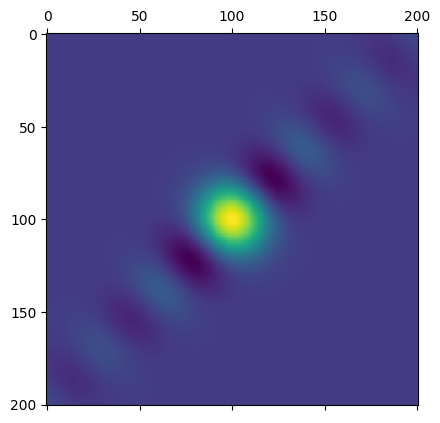

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

N_omega = 201
omega_0 = np.linspace(-100, 100, N_omega)
omega_1 = np.linspace(-50, 50, N_omega)
omega_2 = np.linspace(-20, 20, N_omega)
omega_3 = np.linspace(-10, 10, N_omega)
omega_4 = np.linspace(-5, 5, N_omega)
omega = np.linspace(-20, 20, N_omega)
delta_omega = np.abs(omega[1] - omega[0])
N_z = 6
z = np.linspace(0, 1, N_z)


delta_omega = np.abs(omega_2[1] - omega_2[0])
beta_vec = 0.145*np.exp(-np.linspace(omega_2[0], omega_2[-1], 2*N_omega - 1)**2/7)
beta = delta_omega*scipy.linalg.hankel(beta_vec[:N_omega], beta_vec[N_omega - 1:])
low_gain_JSA = beta*np.sinc((z[-1]/2)*(1/np.pi)*(omega_2 - omega_2[:,np.newaxis]))
sing_vals = scipy.linalg.svd(low_gain_JSA)[1]


plt.matshow(low_gain_JSA)
sum(sing_vals**2)**2/sum((sing_vals)**4)

(1.1254285089705394, (0.5171353643199647+0j))

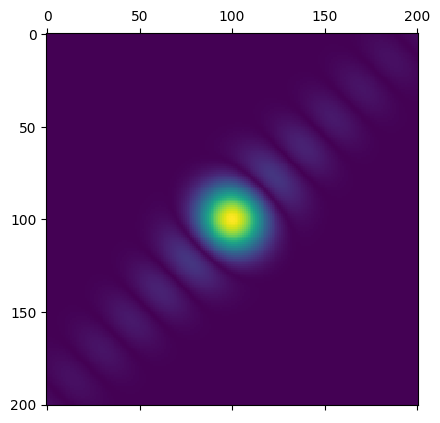

In [40]:
delta_k = 1.j*np.diag(omega_2)
Q_plus = delta_k + beta
Q_minus = delta_k - beta
n = 0.25*np.trace((scipy.linalg.expm(Q_plus*z[-1]) - scipy.linalg.expm(Q_minus*z[-1])).conj().T@(scipy.linalg.expm(Q_plus*z[-1]) - scipy.linalg.expm(Q_minus*z[-1])))
W_plus = [(1/np.sqrt(n))*scipy.linalg.expm(Q_plus*z[i]) for i in range(1, N_z)]
W_minus = [(1/np.sqrt(n))*scipy.linalg.expm(Q_minus*z[i]) for i in range(1, N_z)]
JSA = 0.25*(W_plus[-1] + W_minus[-1])@(W_plus[-1] - W_minus[-1]).conj().T
sing_vals = scipy.linalg.svd(JSA)[1]
plt.matshow(np.abs(JSA))
sum(sing_vals**2)**2/sum((sing_vals)**4), n